<a href="https://colab.research.google.com/github/OssamaChrifi/Video_classification_stage/blob/main/CSVs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSV file classification

We will classify file with csv format which are each save in repertory in which the name is the label. Each file include a set of parameters which represente a kinde of video. We have 8 labels representing a type of video and to classify them we will use different model of classification to see which is better.

# Data Analyse
Firstly we will analyse the data to be able to extract the most usfull feature. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

CSVs_path = '/content/drive/MyDrive/Colab Notebooks/Machine learning classification/CSVs'
categories = os.listdir(CSVs_path)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning classification/CSVs/1 Telediario/La_1_HD-2022_05_06-00h_00m-Program_Telediario_1-15h_00m-15h_54m.csv')
data.head()

,inserted_at,program_id,journey_datetime,content_type,session_id,id,mode,confidence_intervals,lost_frames,timestamp,...,audio_sample_rate,audio_channels,audio_bitrate,url,program_number,program_name,service_name,service_provider,nb_streams,alerts
0,1651842001086,62751bd1d5f2191380c9e9e3,2022-05-06 00:00:00+02:00,live,6275192fd5f2191380c9e9a7,62751bd1d5f2191380c9e9e4,super_exhaustive,"[2.13, 4.27]",0,2022-05-06 14:59:58 CEST,...,48000.0,2.0,0.256,udp://224.0.1.3:5678,534,Telediario 1,La 1 HD,RTVE,16.0,['alert_UnderExposure']
1,1651842003972,62751bd1d5f2191380c9e9e3,2022-05-06 00:00:00+02:00,live,6275192fd5f2191380c9e9a7,62751bd4c667431a14b0b0fe,super_exhaustive,"[2.61, 4.75]",0,2022-05-06 15:00:01 CEST,...,48000.0,2.0,0.256,udp://224.0.1.3:5678,534,Telediario 1,La 1 HD,RTVE,16.0,[]
2,1651842007024,62751bd1d5f2191380c9e9e3,2022-05-06 00:00:00+02:00,live,6275192fd5f2191380c9e9a7,62751bd7c667431a14b0b0ff,super_exhaustive,"[2.14, 4.28]",0,2022-05-06 15:00:03 CEST,...,48000.0,2.0,0.256,udp://224.0.1.3:5678,534,Telediario 1,La 1 HD,RTVE,16.0,[]
3,1651842010607,62751bd1d5f2191380c9e9e3,2022-05-06 00:00:00+02:00,live,6275192fd5f2191380c9e9a7,62751bda0784e7ed76ac9bd0,super_exhaustive,"[3.24, 5.0]",0,2022-05-06 15:00:06 CEST,...,48000.0,2.0,0.256,udp://224.0.1.3:5678,534,Telediario 1,La 1 HD,RTVE,16.0,['alert_UnderExposure']
4,1651842013253,62751bd1d5f2191380c9e9e3,2022-05-06 00:00:00+02:00,live,6275192fd5f2191380c9e9a7,62751bdd0784e7ed76ac9bd3,super_exhaustive,"[1.96, 4.1]",0,2022-05-06 15:00:10 CEST,...,48000.0,2.0,0.256,udp://224.0.1.3:5678,534,Telediario 1,La 1 HD,RTVE,16.0,"['warning_Blocking', 'warning_MOS']"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Columns: 134 entries, inserted_at to alerts
dtypes: bool(1), float64(99), int64(8), object(26)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,inserted_at,lost_frames,beginning_saturation_event_id,final_saturation_event_id,duration,bitrate,frame_rate,width,height,pts,...,final_black_scene_event_id,beginning_contrast_event_id,final_contrast_event_id,beginning_dark_event_id,final_dark_event_id,audio_sample_rate,audio_channels,audio_bitrate,program_number,nb_streams
count,1.099000e+03,1099.000000,4.000000,4.000000,1099.0,1099.000000,1099.0,1099.0,1099.0,1.099000e+03,...,3.000000,48.000000,48.000000,5.000000,5.000000,1099.0,1099.0,1099.000,1099.0,1099.0
mean,1.651844e+12,0.054595,7.750000,7.750000,3.0,3324.925371,25.0,1920.0,1080.0,2.836054e+09,...,1.333333,34.833333,35.312500,11.400000,11.400000,48000.0,2.0,0.256,534.0,16.0
std,9.531506e+05,1.809891,0.957427,0.957427,0.0,641.586694,0.0,0.0,0.0,8.578577e+07,...,0.577350,15.315593,15.902838,1.140175,1.140175,0.0,0.0,0.000,0.0,0.0
min,1.651842e+12,0.000000,7.000000,7.000000,3.0,1550.671997,25.0,1920.0,1080.0,2.687691e+09,...,1.000000,13.000000,13.000000,10.000000,10.000000,48000.0,2.0,0.256,534.0,16.0
25%,1.651843e+12,0.000000,7.000000,7.000000,3.0,2923.157349,25.0,1920.0,1080.0,2.761806e+09,...,1.000000,22.750000,22.750000,11.000000,11.000000,48000.0,2.0,0.256,534.0,16.0
50%,1.651844e+12,0.000000,7.500000,7.500000,3.0,3265.901367,25.0,1920.0,1080.0,2.836137e+09,...,1.000000,33.000000,33.000000,11.000000,11.000000,48000.0,2.0,0.256,534.0,16.0
75%,1.651844e+12,0.000000,8.250000,8.250000,3.0,3639.222656,25.0,1920.0,1080.0,2.910252e+09,...,1.500000,42.250000,44.250000,12.000000,12.000000,48000.0,2.0,0.256,534.0,16.0
max,1.651845e+12,60.000000,9.000000,9.000000,3.0,5615.383789,25.0,1920.0,1080.0,2.984367e+09,...,2.000000,71.000000,72.000000,13.000000,13.000000,48000.0,2.0,0.256,534.0,16.0


In [ ]:
Labels = []
for i in range(len(categories[:])) :
    te = categories[:][i].split(' ')[1:]
    if len(te) > 1 :
        te[0:len(te)] = [' '.join(te[0:len(te)])]        
    Labels.append(te)

Labels[5] = ['Espana directo']
Labels[4] = ['Aqui la Tierra']
print('label :', Labels)


label : [['Downtown Abbey'], ['Peliculas'], ['Telediario'], ['El cazador'], ['Aqui la Tierra'], ['Espana directo'], ['Informativo territorial'], ['Servir y proteger']]


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning classification/CSVs/1 Telediario/La_1_HD-2022_05_06-00h_00m-Program_Telediario_1-15h_00m-15h_54m.csv')
data.loc[:378,data.columns[23:91]].corr()

,temp_inf_max,temp_inf_min,temp_inf_std,temp_inf_median,temp_inf_avg,spat_inf_max,spat_inf_min,spat_inf_std,spat_inf_median,spat_inf_avg,...,blockloss_median,blockloss_avg,blocking_max,blocking_min,blocking_std,blocking_median,blocking_avg,blocking_frames,ringing_max,ringing_min
temp_inf_max,1.000000,0.073315,0.858181,0.306672,0.417331,0.168336,-0.241903,0.458437,0.003468,-0.024877,...,0.083393,0.213466,0.214937,-0.247199,0.250384,-0.081354,-0.015448,-0.034418,0.161008,-0.356301
temp_inf_min,0.073315,1.000000,-0.081792,0.703630,0.727627,0.057055,0.111808,-0.096395,0.046606,0.068954,...,-0.046934,0.005478,-0.059595,-0.106592,-0.064273,-0.077923,-0.085266,-0.111195,-0.028348,-0.044575
temp_inf_std,0.858181,-0.081792,1.000000,0.290873,0.434804,0.211618,-0.288231,0.517517,0.002277,-0.026838,...,0.048685,0.230576,0.267699,-0.210331,0.280065,-0.064280,0.007185,0.000258,0.135698,-0.385272
temp_inf_median,0.306672,0.703630,0.290873,1.000000,0.957368,0.097056,-0.029560,0.079278,0.000386,0.018829,...,-0.065405,0.052519,0.072607,-0.179710,0.071968,-0.093786,-0.066288,-0.081302,-0.060541,-0.235393
temp_inf_avg,0.417331,0.727627,0.434804,0.957368,1.000000,0.136455,-0.080582,0.170036,0.005646,0.015263,...,-0.065881,0.090790,0.096931,-0.207342,0.093075,-0.102601,-0.072241,-0.091118,-0.025336,-0.281399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blocking_median,-0.081354,-0.077923,-0.064280,-0.093786,-0.102601,-0.096459,-0.041089,-0.042602,-0.095950,-0.088515,...,-0.031933,0.030104,0.605639,0.836588,0.445274,1.000000,0.947823,0.749404,0.088753,0.090616
blocking_avg,-0.015448,-0.085266,0.007185,-0.066288,-0.072241,-0.085468,-0.082684,0.011864,-0.101160,-0.098742,...,-0.028382,0.030047,0.770048,0.778070,0.676513,0.947823,1.000000,0.812273,0.099331,0.050744
blocking_frames,-0.034418,-0.111195,0.000258,-0.081302,-0.091118,-0.029322,-0.028244,0.015144,-0.025397,-0.025103,...,-0.014424,0.011980,0.632505,0.612281,0.608605,0.749404,0.812273,1.000000,0.078922,0.024534
ringing_max,0.161008,-0.028348,0.135698,-0.060541,-0.025336,0.493219,0.248322,0.286821,0.405239,0.398392,...,-0.039502,0.101224,0.120020,0.063891,0.107504,0.088753,0.099331,0.078922,1.000000,0.530558


# Data preparation

We split the data  into a testing set and a training set randomly. 80% of data in training set and 20% in testing set.

In [ ]:
from tqdm import tqdm
list_test = []
list_train = []
path_CSVs = '/content/drive/MyDrive/Colab Notebooks/Machine learning classification/CSVs'
try :
    os.mkdir('testing_set')
    os.mkdir('training_set')
except :
    print('folder already exist')
for category in tqdm(categories) :
    list_test.append(os.listdir(path_CSVs + '/' + category)[:int(len(os.listdir(path_CSVs + '/' + category))*0.2)])
    list_train.append(os.listdir(path_CSVs + '/' + category)[int(len(os.listdir(path_CSVs + '/' + category))*0.2):])


100%|██████████| 8/8 [00:00<00:00, 356.61it/s]


In [ ]:
import shutil
count = 0
for category in categories :
    for i in range(len(list_test[count])) :
        if list_test[count][i] == 'La_1_HD-2022_05_18-00h_00m-Program_Informativo_territorial-14h_00m-16h_19m.csv' : 
            continue
        else :
            original_path = path_CSVs + '/' + category + '/' + list_test[count][i]
            target_path = '/content/testing_set/' + list_test[count][i]
            shutil.copyfile(original_path,target_path)
    for i in range(len(list_train[count])) :
        if list_train[count][i] == 'La_1_HD-2022_05_18-00h_00m-Program_Informativo_territorial-14h_00m-16h_19m.csv' : 
            continue
        else :
            original_path = path_CSVs + '/' + category + '/' + list_train[count][i]
            target_path = '/content/training_set/' + list_train[count][i]
            shutil.copyfile(original_path,target_path) 
    count += 1 

creat an  other csv file including each csv paths with their label.

In [ ]:
import glob
train_csv = []
train_class = []
for i in range(len(glob.glob('/content/training_set/*.csv'))) :
    count = 0
    train_csv.append(glob.glob('/content/training_set/*.csv')[i].split('/')[3])
    for y in range(len(Labels)) :
        try :
            try :
                if train_csv[i].find(Labels[y][0].split(' ')[2]) != -1 :
                    train_class.append(Labels[y][0])
                else :
                    count += 1
            except :
                if train_csv[i].find(Labels[y][0].split(' ')[1]) != -1 :
                    train_class.append(Labels[y][0])
                else :
                    count += 1
        except : 
            if train_csv[i].find(Labels[y][0].split(' ')[0]) != -1 :
                train_class.append(Labels[y][0])
            else :
                count += 1

        
    if count == len(Labels) : 
        train_class.append(Labels[1][0])

# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['csv'] = train_csv
train_data['class'] = train_class

# converting the dataframe into csv file 
train_data.to_csv('UCF_train_new.csv',header=True, index=False)

In [ ]:
train = pd.read_csv('/content/UCF_train_new.csv')
train.head()

,csv,class
0,La_1_HD-2022_05_25-00h_00m-Program_Telediario_...,Telediario
1,La_1_HD-2022_05_15-00h_00m-Program_Telediario_...,Telediario
2,La_1_HD-2022_05_21-00h_00m-Program_Telediario_...,Telediario
3,La_1_HD-2022_05_23-00h_00m-Program_El_cazador-...,El cazador
4,La_1_HD-2022_05_14-00h_00m-Program_Cine_de_Bar...,Peliculas


here is the feature that we will extract. We saw that it's the most usfull information to classify

In [ ]:
print(data.columns[23:78])

Index(['temp_inf_max', 'temp_inf_min', 'temp_inf_std', 'temp_inf_median',
       'temp_inf_avg', 'spat_inf_max', 'spat_inf_min', 'spat_inf_std',
       'spat_inf_median', 'spat_inf_avg', 'blurring_max', 'blurring_min',
       'blurring_std', 'blurring_median', 'blurring_avg', 'brightness_Y_max',
       'brightness_Y_min', 'brightness_Y_std', 'brightness_Y_median',
       'brightness_Y_avg', 'brightness_Cr_max', 'brightness_Cr_min',
       'brightness_Cr_std', 'brightness_Cr_median', 'brightness_Cr_avg',
       'brightness_Cb_max', 'brightness_Cb_min', 'brightness_Cb_std',
       'brightness_Cb_median', 'brightness_Cb_avg', 'brightness_sat_max',
       'brightness_sat_min', 'brightness_sat_std', 'brightness_sat_median',
       'brightness_sat_avg', 'contrast_Y_max', 'contrast_Y_min',
       'contrast_Y_std', 'contrast_Y_median', 'contrast_Y_avg',
       'contrast_Cr_max', 'contrast_Cr_min', 'contrast_Cr_std',
       'contrast_Cr_median', 'contrast_Cr_avg', 'contrast_Cb_max',
       'con

In [ ]:
#Build model architecture
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Each csv file don't have the same size. Some csv file have more rows than others so we need to fill the missing value. To do that i fill each rows with the median.

In [ ]:
import numpy as np
from sklearn import preprocessing
train_video = []
for i in tqdm(range(train.shape[0])) :
    try : 
        data = pd.read_csv('training_set/' + train['csv'][i])
        data = data.loc[:,data.columns[23:78]]
        while data.shape[0] < 2000 :
            median = data.median(axis = 0)
            data = data.append(median, ignore_index=True)

        data = preprocessing.scale(data)
        train_video.append(data)
    except :
        print('exception : '+ 'training_set/' + train['csv'][i])

train_video = np.asarray(train_video, dtype = object)
train_video.shape

100%|██████████| 87/87 [03:11<00:00,  2.20s/it]


(87, 2000, 55)

# Model Architecture

i will use different model of classification and i evalute them to see which is better.

In [ ]:
## Model 1 neurone networks

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_video, train_data['class'], test_size = 0.2, stratify = train['class'])

# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

max = X_train.max()
X_train = X_train/max
X_test = X_test/max

# creating the Architecture of the model
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(8, activation = 'softmax'))

# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('/content/weights.hdf5', save_best_only=True, monitor='val_loss', mode='min')

#Compile the model
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#fit the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
3/3 [==============================] - 1s 193ms/step - loss: 1.9247 - accuracy: 0.3478 - val_loss: 1.3697 - val_accuracy: 0.5556
Epoch 2/200
3/3 [==============================] - 0s 104ms/step - loss: 0.5147 - accuracy: 0.9275 - val_loss: 1.1360 - val_accuracy: 0.6111
Epoch 3/200
3/3 [==============================] - 0s 115ms/step - loss: 0.1346 - accuracy: 1.0000 - val_loss: 1.0094 - val_accuracy: 0.7222
Epoch 4/200
3/3 [==============================] - 0s 109ms/step - loss: 0.0641 - accuracy: 1.0000 - val_loss: 0.9329 - val_accuracy: 0.7222
Epoch 5/200
3/3 [==============================] - 0s 107ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.8828 - val_accuracy: 0.7222
Epoch 6/200
3/3 [==============================] - 0s 106ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.8534 - val_accuracy: 0.7222
Epoch 7/200
3/3 [==============================] - 0s 105ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.8355 - val_accuracy: 0.7778
Epoch 8/200
3

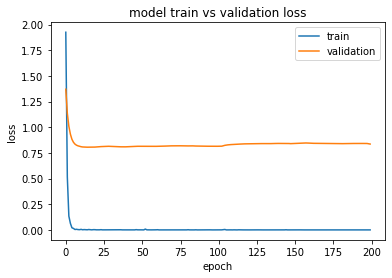

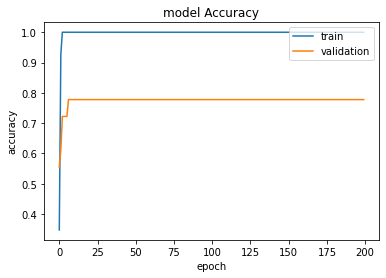

In [ ]:
# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# plot train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

here we see that thera are an important difference between the loss of validation set and the trainig set. that show an Overfitting of the model to fix it there are different methode, change the model or put less data.

In [ ]:
## Model 2 LSTM methode

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_video, train_data['class'], test_size = 0.20, stratify = train['class'])

# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1]*X_test.shape[2])

max = X_train.max()
X_train = X_train/max
X_test = X_test/max

# creating the Architecture of the model
LSTM_model = Sequential()
LSTM_model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
LSTM_model.add(LSTM(100, activation = 'relu'))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Flatten())
LSTM_model.add(Dense(64, activation = 'relu'))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Dense(8, activation = 'softmax'))

# defining a function to save the weights of best model
from keras.callbacks import ModelCheckpoint
mcp_save = ModelCheckpoint('/content/weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')

#Compile the model
LSTM_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#fit the model
history = LSTM_model.fit(X_train, y_train, epochs=100, callbacks=[mcp_save], validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 6s 1s/step - loss: 2.0790 - accuracy: 0.1594 - val_loss: 2.0757 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 2.0692 - accuracy: 0.2464 - val_loss: 2.0700 - val_accuracy: 0.3889
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 2.0351 - accuracy: 0.3913 - val_loss: 2.0608 - val_accuracy: 0.3889
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 1.9697 - accuracy: 0.4783 - val_loss: 2.0437 - val_accuracy: 0.3889
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 1.8771 - accuracy: 0.4348 - val_loss: 2.0154 - val_accuracy: 0.3889
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 1.7457 - accuracy: 0.5507 - val_loss: 1.9742 - val_accuracy: 0.3889
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 1.5892 - accuracy: 0.4783 - val_loss: 1.9169 - val_accuracy: 0.3889
Epoch 8/100
3/3 [=================

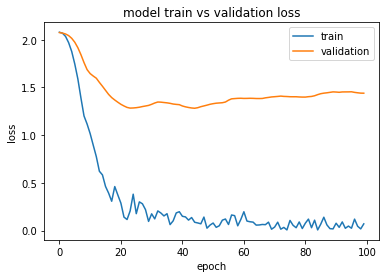

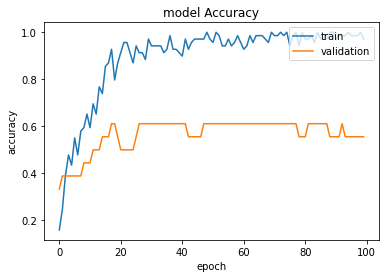

In [ ]:
# plot train and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# plot train and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


we have the same result than the neurone network model. To fix the overfitting we will use a model of classification more simple

In [ ]:
import numpy as np
from sklearn import preprocessing
from tqdm import tqdm
import glob
train_video = []
for category in categories :
    for i in tqdm(range(len(glob.glob(CSVs_path+'/'+ category + '/*.csv')))) :
        try :
            data = pd.read_csv(glob.glob(CSVs_path+'/'+ category + '/*.csv')[i])
            data = data.loc[:,data.columns[23:78]]
            while data.shape[0] < 2000 :
                median = data.median(axis = 0)
                data = data.append(median, ignore_index=True)

            train_video.append(data)
        except Exception as e:
            print('\n')
            print(e)
            print('\n'+ glob.glob(CSVs_path+'/'+ category + '/*.csv')[i])

train_video = np.asarray(train_video, dtype = object)
train_video.shape

 43%|████▎     | 3/7 [00:22<00:28,  7.15s/it]



No columns to parse from file

/content/drive/MyDrive/Colab Notebooks/Machine learning classification/CSVs/2 Informativo territorial/La_1_HD-2022_05_18-00h_00m-Program_Informativo_territorial-14h_00m-16h_19m.csv


100%|██████████| 13/13 [01:03<00:00,  4.87s/it]


(105, 2000, 55)

In [ ]:
labels = []
Labels = []
for i in range(len(categories[:])) :
    te = categories[:][i].split(' ')[1:]
    if len(te) > 1 :
        te[0:len(te)] = [' '.join(te[0:len(te)])]        
    labels.append(te)

for i in range(len(labels)) :
    Labels.append(labels[i][0])

In [ ]:
import glob
train_csv = []
train_class = []
for category in categories : 
    for i in range(len(glob.glob(CSVs_path+'/'+ category + '/*.csv'))) :
        if glob.glob(CSVs_path+'/'+ category + '/*.csv')[i].split('/')[-1] == 'La_1_HD-2022_05_18-00h_00m-Program_Informativo_territorial-14h_00m-16h_19m.csv' :
            continue

        train_csv.append(glob.glob(CSVs_path+'/'+ category + '/*.csv')[i].split('/')[-1])
        for y in range(len(Labels)) :
            if glob.glob(CSVs_path+'/'+ category + '/*.csv')[i].split('/')[-2].split(' ')[-1] == Labels[y].split(' ')[-1] :
                train_class.append(Labels[y])
            else :
                continue

# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['csv'] = train_csv
train_data['class'] = train_class

# converting the dataframe into csv file 
train_data.to_csv('CSV_all_new.csv',header=True, index=False)

In [ ]:
train = pd.read_csv('/content/CSV_all_new.csv')
train.head()

,csv,class
0,La_1_HD-2022_05_06-00h_00m-Program_Downton_Abb...,Downtown Abbey
1,La_1_HD-2022_05_10-00h_00m-Program_Downton_Abb...,Downtown Abbey
2,La_1_HD-2022_05_11-00h_00m-Program_Downton_Abb...,Downtown Abbey
3,La_1_HD-2022_05_12-00h_00m-Program_Downton_Abb...,Downtown Abbey
4,La_1_HD-2022_05_16-00h_00m-Program_Downton_Abb...,Downtown Abbey


In [ ]:
## methode 3 Random Forest methode

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_video, train_data['class'], test_size = 0.20, stratify = train['class'])

# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

#Normalization

max = X_train.max()
X_train = X_train/max
X_test = X_test/max


we use GridSearchCV to find the best parametere of the model to increase the accurency.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv= 5)

CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(max_features='auto', n_estimators= 200, max_depth=5, criterion='entropy')
rfc1.fit(X_train, y_train)

now we evaluate the model using the accurency and the cofusion matrix

In [ ]:
print(f'Train accurency :{rfc1.score(X_train, y_train):.3f}')
print(f'Test accurency :{rfc1.score(X_test, y_test):.3f}')
print('============================================================')
probabilities = rfc1.predict(X_test)
prediction = np.argmax(probabilities,axis=1)
actual = np.argmax(y_test,axis=1)
count = 0
for label in Labels :
    total = 0
    sum = 0
    for i in range(len(actual)) :
        if (actual[i] == count) & (prediction[i] == count) :
            sum += 1
            total += 1
        elif (actual[i] == count) & (prediction[i] != count) :
            total += 1
        else : 
            continue
    try : 
        print(f'{label} : {sum/total*100} % with {total} csv file')
    except Exception as e :
        print(e)
    count += 1


Train accurency :0.964
Test accurency :0.952
Downtown Abbey : 100.0 % with 2 csv file
Peliculas : 50.0 % with 2 csv file
Telediario : 100.0 % with 3 csv file
El cazador : 100.0 % with 2 csv file
Aqui la tierra : 100.0 % with 1 csv file
Espana Directo : 100.0 % with 2 csv file
Informativo territorial : 100.0 % with 3 csv file
Servir y proteger : 100.0 % with 6 csv file


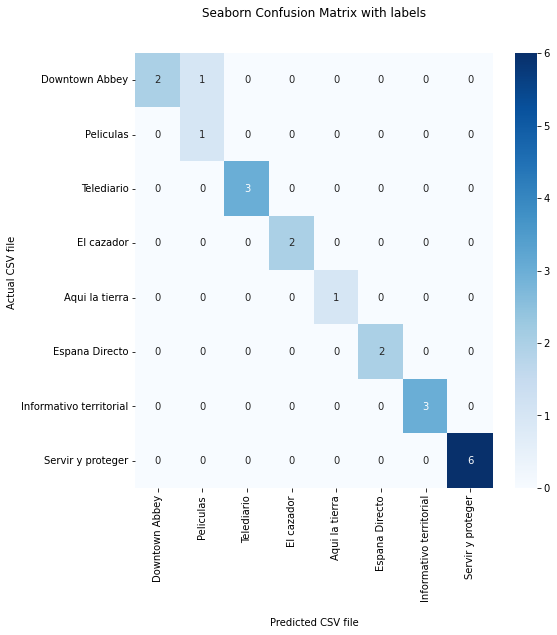

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(prediction, actual)

plt.figure(figsize=(8,8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted CSV file')
ax.set_ylabel('Actual CSV file ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(Labels)
ax.yaxis.set_ticklabels(Labels)

## Display the visualization of the Confusion Matrix.
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

we see the model performance is good 

In [ ]:
## methode 4 Tree decision methode

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_video, train_data['class'], test_size = 0.20, stratify = train['class'])

# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

# Normalisation
max = X_train.max()
X_train = X_train/max
X_test = X_test/max

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_


print(f'Train accurency :{final_model.score(X_train, y_train):.3f}')
print(f'Train accurency :{final_model.score(X_test, y_test):.3f}')

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Train accurency :1.000
Train accurency :0.714


In [ ]:
## methode 5 knn methode

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_video, train_data['class'], test_size = 0.20, stratify = train['class'])

# creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# reshaping the training as well as validation frames in single dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

max = X_train.max()
X_train = X_train/max
X_test = X_test/max

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_


print(f'Train accurency :{gs_knn.score(X_train, y_train):.3f}')
print(f'Train accurency :{gs_knn.score(X_test, y_test):.3f}')

Train accurency :0.774
Train accurency :0.714


# Evaluation of neurone network and LSTM model

In [ ]:
test_csv = []
test_class = []
for i in range(len(glob.glob('/content/testing_set/*.csv'))) :
    count = 0
    test_csv.append(glob.glob('/content/testing_set/*.csv')[i].split('/')[3])
    for y in range(len(Labels)) :
        try :
            try :
                if test_csv[i].find(Labels[y][0].split(' ')[2]) != -1 :
                    test_class.append(Labels[y][0])
                else :
                    count += 1
            except :
                if test_csv[i].find(Labels[y][0].split(' ')[1]) != -1 :
                    test_class.append(Labels[y][0])
                else :
                    count += 1
        except : 
            if test_csv[i].find(Labels[y][0].split(' ')[0]) != -1 :
                test_class.append(Labels[y][0])
            else :
                count += 1

        
    if count == len(Labels) : 
        test_class.append(Labels[1][0])

# storing the images and their class in a dataframe
test_data = pd.DataFrame()
test_data['csv'] = test_csv
test_data['class'] = test_class

# converting the dataframe into csv file 
test_data.to_csv('UCF_test_new.csv',header=True, index=False)

In [ ]:
test = pd.read_csv('/content/UCF_test_new.csv')
test.head()

,csv,class
0,La_1_HD-2022_05_06-00h_00m-Program_Downton_Abb...,Downtown Abbey
1,La_1_HD-2022_05_06-00h_00m-Program_Aquí_la_Ti...,Aqui la Tierra
2,La_1_HD-2022_05_11-00h_00m-Program_Telediario_...,Telediario
3,La_1_HD-2022_05_12-00h_00m-Program_Telediario_...,Telediario
4,La_1_HD-2022_05_14-00h_00m-Program_Un_amor_en_...,Peliculas


In [ ]:
Labels = [Labels[n][0] for n in range(len(Labels))]
print(Labels)

['Downtown Abbey', 'Peliculas', 'Telediario', 'El cazador', 'Aqui la Tierra', 'Espana directo', 'Informativo territorial', 'Servir y proteger']


In [ ]:
#LSTM classification model
LSTM_model = Sequential()
LSTM_model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape=(1, train_video.shape[1]*train_video.shape[2])))
LSTM_model.add(LSTM(100, activation = 'relu'))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Flatten())
LSTM_model.add(Dense(64, activation = 'relu'))
LSTM_model.add(Dropout(0.5))
LSTM_model.add(Dense(8, activation = 'softmax'))
# loading the trained weights
LSTM_model.load_weights("weight.hdf5")
# compiling the model
LSTM_model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
## model LSTM
from scipy import stats as s

# creating two lists to store predicted and actual tags
predict = []
actual = []

y = train_data['class']
y = pd.get_dummies(y)

# for loop to extract frames from each test video
for i in tqdm(range(len(test_data['csv']))): 
    # reading all the frames from temp folder
    prediction_csv = []
    data = pd.read_csv('/content/testing_set/' + test_data['csv'][i])
    data = data.loc[:,data.columns[23:78]]
    while data.shape[0] < 2000 :
        mean = data.median(axis = 0)
        data = data.append(mean, ignore_index=True)

    data = preprocessing.scale(data)
    max = X_train.max()
    data = data/max
    prediction_csv.append(data) 

    # converting all the frames for a test video into numpy array
    prediction_csv = np.asarray(prediction_csv, dtype = object)
    # converting features in one dimensional array
    prediction_csv = prediction_csv.reshape(prediction_csv.shape[0],1 ,prediction_csv.shape[1]*prediction_csv.shape[2])
    prediction_csv = np.asarray(prediction_csv).astype(np.float32)
    #we use our model to have the probability vectors for each csv
    prediction = LSTM_model.predict(prediction_csv)
    # predicting tags for each array
    prediction=np.argmax(prediction,axis=1)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict.append(y.columns.values[s.mode(prediction)[0][0]])
# appending the actual tag of the video
actual = test_data['class'].values


100%|██████████| 18/18 [01:02<00:00,  3.49s/it]


In [ ]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predict, actual)*100

55.55555555555556

In [ ]:
## model neurone network
from scipy import stats as s

# creating two lists to store predicted and actual tags
predict = []
actual = []

y = train_data['class']
y = pd.get_dummies(y)

# for loop to extract frames from each test video
for i in tqdm(range(len(test_data['csv']))): 
    # reading all the frames from temp folder
    prediction_csv = []
    data = pd.read_csv('/content/testing_set/' + test_data['csv'][i])
    data = data.loc[:,data.columns[23:78]]
    while data.shape[0] < 2000 :
        mean = data.median(axis = 0)
        data = data.append(mean, ignore_index=True)

    data = preprocessing.scale(data)
    max = X_train.max()
    data = data/max
    prediction_csv.append(data) 

    # converting all the frames for a test video into numpy array
    prediction_csv = np.asarray(prediction_csv, dtype = object)
    # converting features in one dimensional array
    prediction_csv = prediction_csv.reshape(prediction_csv.shape[0],prediction_csv.shape[1]*prediction_csv.shape[2])
    prediction_csv = np.asarray(prediction_csv).astype(np.float32)
    #we use our model to have the probability vectors for each csv
    prediction = model.predict(prediction_csv)
    # predicting tags for each array
    prediction=np.argmax(prediction,axis=1)
    # appending the mode of predictions in predict list to assign the tag to the video
    predict.append(y.columns.values[s.mode(prediction)[0][0]])
# appending the actual tag of the video
actual = test_data['class'].values


100%|██████████| 18/18 [00:42<00:00,  2.39s/it]


In [ ]:
# checking the accuracy of the predicted tags
from sklearn.metrics import accuracy_score
accuracy_score(predict, actual)*100

55.55555555555556

# Conclusion 

We see that the random forest has the higher performance than the others methode of classification.